<a href="https://colab.research.google.com/github/AizazurRahman1/CS-351L-AI-Lab-Repository_2022078/blob/main/Aizaz_ur_Rahman_CS351L_Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving train.csv to train.csv
Dataset Information:
Number of samples: 891
Number of features: 12

First few rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9

<ipython-input-2-0c718684c083>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
<ipython-input-2-0c718684c083>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

IntSlider(value=3, continuous_update=False, description='k Value:', max=10, min=1)

Button(description='Run k-NN', style=ButtonStyle())

Button(description='Run Decision Tree', style=ButtonStyle())

Output()

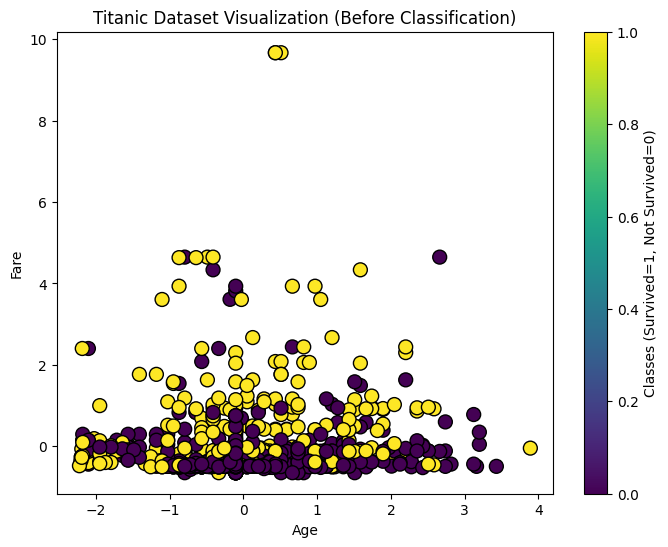

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import ipywidgets as widgets
from IPython.display import display, clear_output
from google.colab import files
uploaded = files.upload()

# Load Titanic dataset
titanic_data = pd.read_csv('train.csv')


# Display basic information
print("Dataset Information:")
print(f"Number of samples: {titanic_data.shape[0]}")
print(f"Number of features: {titanic_data.shape[1]}")
print("\nFirst few rows of the dataset:")
print(titanic_data.head())

# Fill missing Age with median, drop Cabin due to too many missing values
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
titanic_data.drop('Cabin', axis=1, inplace=True)

# Encode categorical variables
le = LabelEncoder()
titanic_data['Sex'] = le.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = le.fit_transform(titanic_data['Embarked'])

# Standardize numerical features
scaler = StandardScaler()
titanic_data[['Age', 'Fare']] = scaler.fit_transform(titanic_data[['Age', 'Fare']])

# Drop unnecessary columns
titanic_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Prepare features and target variable
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a widget for selecting k value for k-NN
k_slider = widgets.IntSlider(value=3, min=1, max=10, step=1, description='k Value:', continuous_update=False)

# Creating a button widget for running k-NN classification
run_knn_button = widgets.Button(description='Run k-NN')

# Creating a button widget for running Decision Tree classification
run_tree_button = widgets.Button(description='Run Decision Tree')

# Output area to display plots and results
output = widgets.Output()

# Function to run k-NN with selected k value and display results
def run_knn(change):
    with output:
        clear_output()  # Clear previous output

        # Getting the selected k value from the slider
        k = k_slider.value

        # Implementing k-Nearest Neighbors with selected k
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)  # Train the k-NN model on the training data

        # Making predictions on the test set
        y_pred = knn.predict(X_test)

        # Evaluate the model's performance
        accuracy = accuracy_score(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)

        # Display the accuracy and classification report
        print(f"Accuracy of k-NN with k={k}: {accuracy * 100:.2f}%")
        print("\nClassification Report:\n", classification_rep)

        # Visualizing the data after classification (using two features for 2D plot)
        plt.figure(figsize=(8,6))
        plt.scatter(X_test['Age'], X_test['Fare'], c=y_pred, cmap='coolwarm', edgecolor='k', s=100)
        plt.title(f'Titanic Dataset Classification (k-NN with k={k})')
        plt.xlabel('Age')
        plt.ylabel('Fare')
        plt.colorbar(label='Predicted Classes')
        plt.show()

# Function to run Decision Tree and display results
def run_decision_tree(change):
    with output:
        clear_output()  # Clear previous output

        # Implementing Decision Tree
        tree = DecisionTreeClassifier(random_state=42)
        tree.fit(X_train, y_train)  # Train the model

        # Making predictions on the test set
        y_pred = tree.predict(X_test)

        # Evaluate the model's performance
        accuracy = accuracy_score(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)

        # Display the accuracy and classification report
        print(f"Accuracy of Decision Tree: {accuracy * 100:.2f}%")
        print("\nClassification Report:\n", classification_rep)

        # Visualizing the data after classification (using two features for 2D plot)
        plt.figure(figsize=(8,6))
        plt.scatter(X_test['Age'], X_test['Fare'], c=y_pred, cmap='coolwarm', edgecolor='k', s=100)
        plt.title('Titanic Dataset Classification (Decision Tree)')
        plt.xlabel('Age')
        plt.ylabel('Fare')
        plt.colorbar(label='Predicted Classes')
        plt.show()

# Connecting the buttons to their respective functions
run_knn_button.on_click(run_knn)
run_tree_button.on_click(run_decision_tree)

# Displaying the widgets and output area
display(k_slider, run_knn_button, run_tree_button, output)

# Initial visualization of two features (Age and Fare) before classification
plt.figure(figsize=(8,6))
plt.scatter(X['Age'], X['Fare'], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('Titanic Dataset Visualization (Before Classification)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.colorbar(label='Classes (Survived=1, Not Survived=0)')
plt.show()
